# Chapter 4 Hypothesis testing

## Example 4.3 Two samples

Test the difference of two means. The box-plot is not helpful.

ans =
  Columns 1 through 7
    0.5152    0.2614   -0.9415   -0.1623   -0.1461   -0.5320    1.6821
  Columns 8 through 14
   -0.8757   -0.4838   -0.7120   -1.1742   -0.1922   -0.2741    1.5301
  Columns 15 through 21
   -0.2490   -1.0642    1.6035    1.2347   -0.2296   -1.5062   -0.4446
  Columns 22 through 26
   -0.1559    0.2761   -0.2612    0.4434    0.3919
ans =
  Columns 1 through 7
   -0.5005   -0.2584   -0.0929    0.0937    0.2435    0.5100   -1.9233
  Columns 8 through 14
    0.1344    1.4940   -0.3534    1.2470    0.7803    0.4768    0.6460
  Column 15
   -0.7520
grp =
  Columns 1 through 13
     1     1     1     1     1     1     1     1     1     1     1     1     1
  Columns 14 through 26
     1     1     1     1     1     1     1     1     1     1     1     1     1
  Columns 27 through 39
     2     2     2     2     2     2     2     2     2     2     2     2     2
  Columns 40 through 41
     2     2


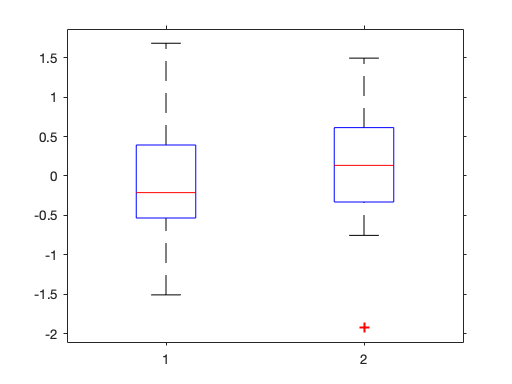

In [11]:
rng = 123;
x = normrnd(0, 1, [26,1]);
y = normrnd(0.5, 0.8, [15,1]);
x'
y'

grp = [ones(1, 26), ones(1, 15)*2];
grp
boxplot([x;y], grp)

grp =
  Columns 1 through 13
     1     1     1     1     1     1     1     1     1     1     1     1     1
  Columns 14 through 26
     1     1     1     1     1     1     1     1     1     1     1     1     1
  Columns 27 through 39
     2     2     2     2     2     2     2     2     2     2     2     2     2
  Columns 40 through 41
     2     2


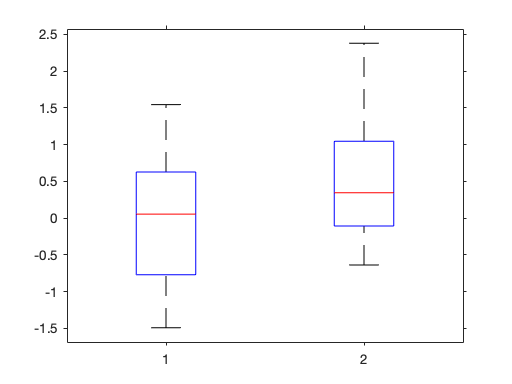

### Example 4.11 Binomial Test
Power function $p \mapsto P_p(X \ge 59)$.

In [2]:
pow_bin = @(p) 1 - binocdf(59, 100, p)


pow_bin =

  function_handle with value:

    @(p)1-binocdf(59,100,p)



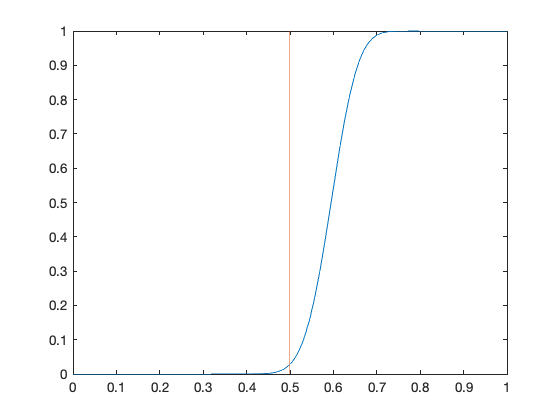

In [6]:
fplot(pow_bin, [0,1])
vline(0.5, '-')

### Figure 4.4 
The function $x \mapsto P_{0.5}(X\ge x)$ for $X \sim Bin(100, 0.5)$.

In [8]:
bino = @(x)  1 - binocdf(x, 100, 0.5);

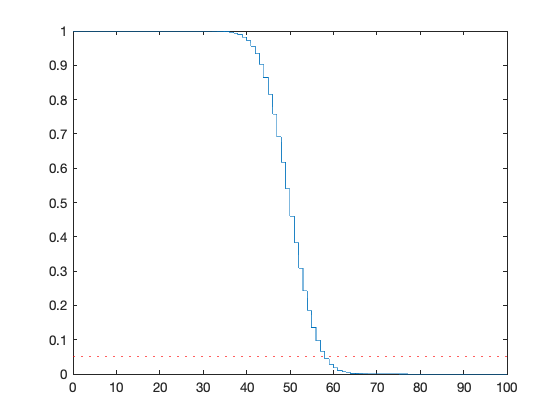

In [9]:
fplot(bino, [0, 100])

hline(0.05)

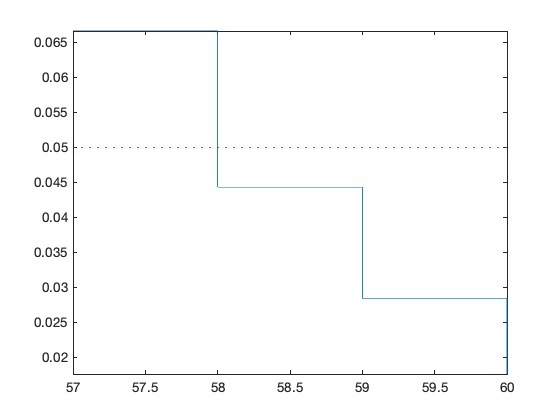

In [11]:
fplot(bino, [57, 60])

hline(0.05)

### Figure 4.5 Power function for the Gauss test
- Red. One sided test $H_0: \mu \le 0$ vs $H_1: \mu > 0$
- Blue. One sided test $H_0: \mu \ge 0$ vs $H_1: \mu < 0$
- Yellow. Two-sided test $H_0 \mu = \mu_0$ vs $H_1: \mu \ne \mu_0$

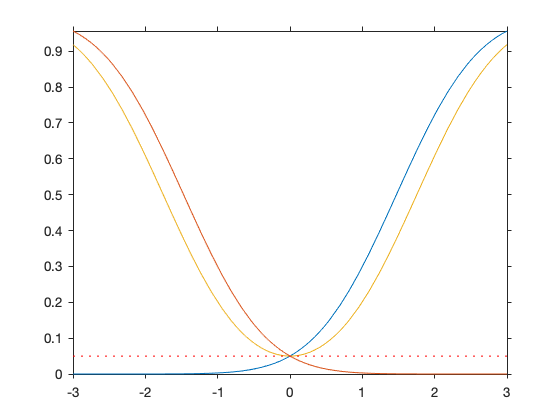

In [5]:
n = 5;
a0 = 0.05;
mu0 = 0;
sigma = 2;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])

hold on

pow_gauss_L = @(mu) normcdf(-norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_L, [-3,3])

pow_gauss_2 = @(mu) 1 - normcdf( norminv(1-a0/2)  - sqrt(n) .*(mu - mu0) ./ sigma) +  normcdf(norminv(a0/2) - sqrt(n) .*(mu-mu0) ./sigma);
fplot(pow_gauss_2, [-3,3])


hline(0.05)
hold off


### Example 4.15 Gauss test, power function

Compare $n = 5$ with $n = 50$.

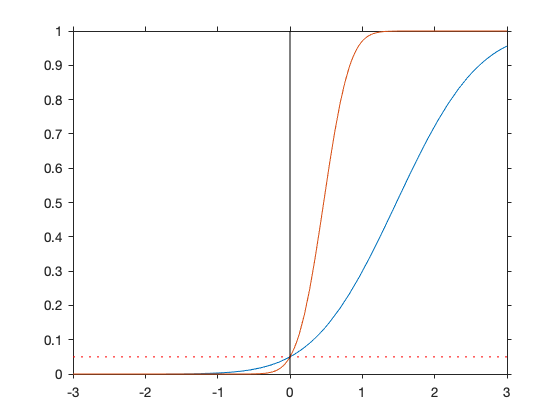

In [18]:
a0 = 0.05;
mu0 = 0;
sigma = 2;
n = 5;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hold on
n = 50;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hline(a0)
vline(0,'-k')
hold off

Compare $\sigma = 2$ with $\sigma = 4$.

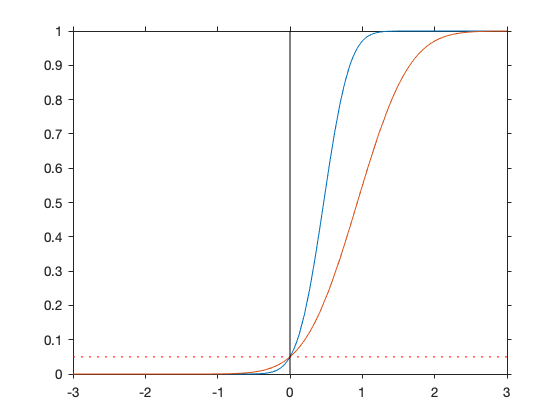

In [19]:
n = 50;
a0 = 0.05;
mu0 = 0;
sigma = 2;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hold on
sigma = 4;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hline(a0)
vline(0,'-k')
hold off


Compare $\alpha_0 = 0.05$ with $\alpha_0 = 0.10$.

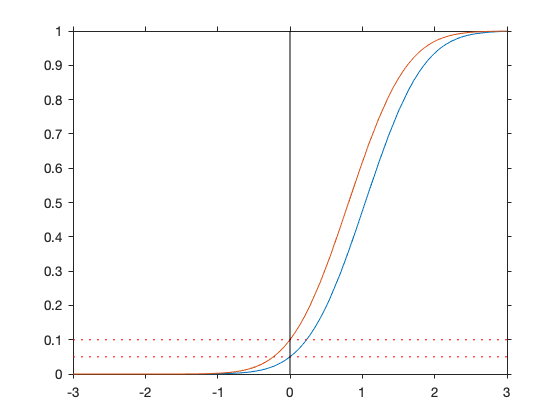

In [20]:
n = 10;
a0 = 0.05;
mu0 = 0;
sigma = 2;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hold on
hline(a0)
a0 = 0.1;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hline(a0)
vline(0, '-k')
hold off

### Example 4.16

Solution of the system to find the minimal sample size.

In [33]:
syms n positive
solve((n+1)/2 + 1.645 * sqrt(n)/2 - n *0.6 - 1/2 + 0.842 *sqrt(n*0.24), n)

ans =
((421*6^(1/2))/250 + 329/40)^2


In [34]:
eval(ans)

ans =
  152.5210


###  Example 4.18 Contaminated pool water

Transform $H_0: p_\mu \le 0.05$ where $p_\mu = P_\mu (X > 100)$ into $H_0': \mu \le 85.05$.

In [13]:

syms mu positive
fzero(@(mu) poissinv(0.95, mu) - 100.5, 50)


ans =

   85.0571



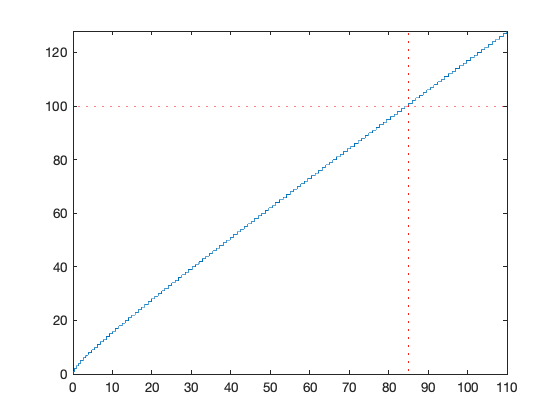

In [17]:

fplot(@(mu) poissinv(0.95, mu), [0, 110])
hline(100)
vline(85.0571)